In [7]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from matplotlib.pyplot import *
import cv2
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras import datasets, layers, models

In [2]:
pip install patool

In [4]:
import patoolib

In [3]:
patoolib.extract_archive('/content/archive (7).zip')

patool: Extracting /content/archive (7).zip ...
patool: running /usr/bin/7z x -o./Unpack_vz7099zm -- "/content/archive (7).zip"
patool: ... /content/archive (7).zip extracted to `archive (7)2' (multiple files in root).


'archive (7)2'

In [5]:
d="/content/dataset/Garbage classification/Garbage classification"
classes=["cardboard","glass","metal","paper","plastic","trash"]

In [6]:
data=[]
for c in classes:
    i=classes.index(c)
    path=os.path.join(d,c)
    for img in os.listdir(path):
        im=cv2.imread(os.path.join(path,img))
        im=cv2.resize(im,(224,224))
        data.append([im,i])

In [8]:
data=np.array(data)
random.shuffle(data)

<ipython-input-8-ee59c8db453f>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data=np.array(data)


In [9]:
X=[]
Y=[]
for x,y in data:
    X.append(x)
    Y.append(y)

In [10]:
x=np.array(X)
y=np.array(Y)

In [11]:
print(x.shape,y.shape)

(2527, 224, 224, 3) (2527,)


In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=4, stratify=y)

In [13]:
X_train = x_train / 255.0
X_test = x_test / 255.0

In [14]:
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(1516, 224, 224, 3) (1516,)
(1011, 224, 224, 3) (1011,)


In [15]:
model=tf.keras.applications.mobilenet_v2.MobileNetV2(
    input_shape=None,
    alpha=1.0,
    include_top=True,
    weights='imagenet',
    input_tensor=None,
    pooling=None,
    classes=1000,
    classifier_activation='softmax'
)

In [16]:
model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                              

In [18]:
base_input=model.layers[0].input
base_output=model.layers[-2].output

In [19]:
final_output = layers.Dense(128)(base_output)
final_output = layers.Activation('relu')(final_output)
final_output = layers.Dense(64)(final_output)
final_output = layers.Activation('relu')(final_output)
final_output = layers.Dense(7, activation='softmax')(final_output)




In [20]:
new_model = tf.keras.Model(inputs = base_input, outputs = final_output)

In [21]:
new_model.compile(loss="sparse_categorical_crossentropy", optimizer = "SGD", metrics = ["accuracy"])

In [22]:
history=new_model.fit(X_train, y_train, epochs = 30,validation_data=(X_test, y_test))

Epoch 1/30
48/48 [==============================] - 36s 243ms/step - loss: 0.9308 - accuracy: 0.6893 - val_loss: 1.0214 - val_accuracy: 0.6637
Epoch 2/30
48/48 [==============================] - 8s 159ms/step - loss: 0.3562 - accuracy: 0.8997 - val_loss: 0.9718 - val_accuracy: 0.6459
Epoch 3/30
48/48 [==============================] - 8s 176ms/step - loss: 0.1969 - accuracy: 0.9485 - val_loss: 1.2210 - val_accuracy: 0.4955
Epoch 4/30
48/48 [==============================] - 9s 179ms/step - loss: 0.1071 - accuracy: 0.9756 - val_loss: 1.0114 - val_accuracy: 0.6222
Epoch 5/30
48/48 [==============================] - 7s 151ms/step - loss: 0.0699 - accuracy: 0.9842 - val_loss: 0.9121 - val_accuracy: 0.6419
Epoch 6/30
48/48 [==============================] - 9s 179ms/step - loss: 0.0474 - accuracy: 0.9908 - val_loss: 0.8837 - val_accuracy: 0.6508
Epoch 7/30
48/48 [==============================] - 8s 178ms/step - loss: 0.0462 - accuracy: 0.9941 - val_loss: 0.7610 - val_accuracy: 0.7161
Epoch

In [23]:
new_model.evaluate(X_test,y_test)

32/32 [==============================] - 1s 45ms/step - loss: 0.1932 - accuracy: 0.9347


[0.19323457777500153, 0.9347180724143982]

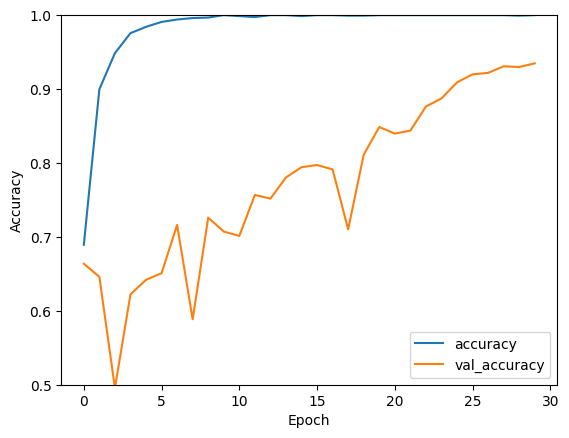

In [24]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [27]:
y_pred=new_model.predict(X_test)

32/32 [==============================] - 3s 44ms/step


In [28]:
pred=[]
for i in range(len(y_pred)):
    pred.insert(i,np.argmax(y_pred[i]))


In [29]:
pred=np.array(pred)
pred

array([0, 0, 0, ..., 0, 1, 0])